> # **Parcial 1 Análisis Avanzado de Datos**
> ### **Punto 2**
>
>
>
>
---

## comentarios

### **Regresión Polinomial y Validación Cruzada (10pts)**

no usa validación cruzada en  todo el conjunto de datos
es decir, el entrenamiento siempre es con los mismos datos

### ***puntos 4/10***

### **Regularización**

no usa validación cruzada en  todo el conjunto de datos

### ***puntos 5/10***


### **bootstrap**

ok , con datos de entrenamiento

### ***puntos 10/10***



> Comenzamos importando las librerías que se necesitarán para el desarrollo del ejericio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import resample
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

> ## **Actividad**
>
> Desarrollar un modelo de regresión polinomial para predecir la variable objetivo. Validar el rendimiento del modelo utilizando técnicas de validación cruzada y bootstrap. Tenemos los siguientes datos:
> * Conjunto de entrenamiento de características (x_train): 12 observaciones
> * Conjunto de validación de características (x_val): 10 observaciones
> * Conjunto de entrenamiento de etiquetas (y_train): 12 observaciones
> * Conjunto de validación de etiquetas (y_val): 10 observaciones



> ## **Solución**
>
> Cargamos y visualizamos los datos de cada conjunto

In [ ]:
X_Train = np.load('part2xTrain.npy')
y_Train = np.load('part2yTrain.npy')
X_Val = np.load('part2xVal.npy')
y_Val = np.load('part24yVal.npy')

In [ ]:
X_Train

array([-2.13979053,  2.44720121, -2.47531695, -0.49506981, -1.76334267,
        1.08597516, -2.39292659, -1.40980993, -0.45666345,  2.05461486,
        1.45180619,  1.94814015])

> **Regresión polinomial y validación cruzada**
>
> Implementaremos regresión polinomial con distintos grados, utilizando validación cruzada y reportando métricas MSE y MAE.

> En primer lugar, vamos a definir una función que realiza un `reshape` de las variables de entrada y utiliza `PolynimialFeatures` para crear una matriz en la que la columna $i$ respresenta $x^{i}$.

In [ ]:
def create_matrix(X, order):
  X_new = X.reshape(-1,1)
  poly = PolynomialFeatures(order)
  X_new = poly.fit_transform(X_new)
  return X_new

> Esta función nis retorna matrices de la siguiente forma

In [ ]:
create_matrix(X_Train,3)

array([[  1.        ,  -2.13979053,   4.57870351,  -9.7974664 ],
       [  1.        ,   2.44720121,   5.98879378,  14.65578342],
       [  1.        ,  -2.47531695,   6.12719402, -15.16674723],
       [  1.        ,  -0.49506981,   0.24509411,  -0.1213387 ],
       [  1.        ,  -1.76334267,   3.10937737,  -5.4828978 ],
       [  1.        ,   1.08597516,   1.17934206,   1.28073619],
       [  1.        ,  -2.39292659,   5.72609764, -13.70213128],
       [  1.        ,  -1.40980993,   1.98756403,  -2.80208751],
       [  1.        ,  -0.45666345,   0.20854151,  -0.09523329],
       [  1.        ,   2.05461486,   4.22144222,   8.67343792],
       [  1.        ,   1.45180619,   2.10774121,   3.06003174],
       [  1.        ,   1.94814015,   3.79525006,   7.39367903]])

> Ahora, utilizaremos regresión lineal multivariable con la nueva matriz creada para obtener los coeficientes de la regresión polinomial y así calcular las métricas del modelo

In [ ]:
def polynomal_regression(X,y, Xval, yval, order):
  X_new = create_matrix(X, order)
  regr = LinearRegression()
  regr.fit(X_new, y)

  Xval_new = create_matrix(Xval, order)

  # Realizamos cross-validation
  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  # Realice la validación cruzada utilizando kf
  cv_scores = cross_val_score(regr, X_new, y, cv=kf)
  print(f'Valor promedio del score de cross-validation: {np.mean(cv_scores)}')

  # Calculamos MSE
  y_pred = regr.predict(Xval_new)
  mse = mean_squared_error(yval, y_pred)
  print(f'MSE: {mse}')

  # Calculamos MAE
  mae = mean_absolute_error(yval, y_pred)
  print(f'MAE: {mae}')

  return regr

> Llamamos a la función `polynomial_regression` varias veces, para polinomios de distintos grados

In [ ]:
for i in range(1,7):
  print(f'Métricas para polinomio de grado {i}')
  polynomal_regression(X_Train,y_Train, X_Val, y_Val, i)
  print('----------------------------------------------------------------------')

Métricas para polinomio de grado 1
Valor promedio del score de cross-validation: -12.469158765949839
MSE: 347.9544443340795
MAE: 16.618763354882102
----------------------------------------------------------------------
Métricas para polinomio de grado 2
Valor promedio del score de cross-validation: -4.877496925052329
MSE: 117.05886648167632
MAE: 10.05527563344862
----------------------------------------------------------------------
Métricas para polinomio de grado 3
Valor promedio del score de cross-validation: -11.85660623083467
MSE: 121.7310945641178
MAE: 10.239273706669419
----------------------------------------------------------------------
Métricas para polinomio de grado 4
Valor promedio del score de cross-validation: 0.9590245603346675
MSE: 3.8223763261331145
MAE: 1.6225600872046158
----------------------------------------------------------------------
Métricas para polinomio de grado 5
Valor promedio del score de cross-validation: 0.9469968785092874
MSE: 3.8268924140629843
MA

> Vamos a graficar el polinomio del mejor resultado (grado 4)

In [ ]:
xcoor = np.linspace(min(X_Val),max(X_Val),100).T
X_matrix = create_matrix(xcoor, 4)
regr = polynomal_regression(X_Train,y_Train, X_Val, y_Val, 4)
ycoor = regr.predict(X_matrix)

Valor promedio del score de cross-validation: 0.9590245603346675
MSE: 3.8223763261331145
MAE: 1.6225600872046158


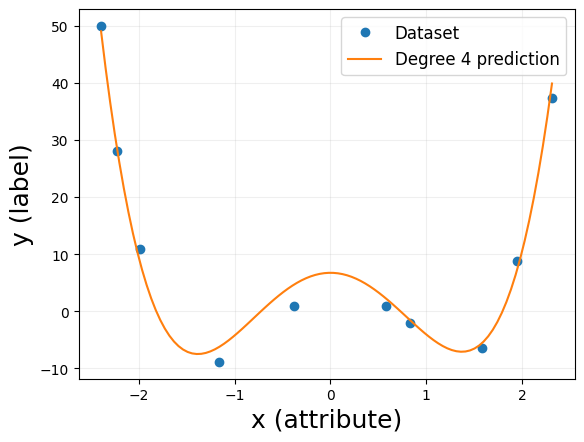

In [ ]:
plt.plot(X_Val, y_Val, 'o', label="Dataset")
plt.plot(xcoor, ycoor, label="Degree 4 prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

> **Mejoramos el modelo utilizando regularización**
>
> Vamos a utilizar `RidgeCV` y `LassoCV` para implementar regresión lineal con regularización y encontrar el hiperparámetro *lambda* óptimo mediante valización cruzada.

> Creamos un arreglo de *lambdas*

In [ ]:
lambdas = 10**np.linspace(10,-2,100)*0.5

> Encontramos el óptimo para cada modelo, lo imprimimos y calculamos las métricas. Primero utilizaremos **regresión Ridge**

In [ ]:
def polynomal_ridge_regression(X,y, Xval, yval, order, lambdas):
  X_new = create_matrix(X, order)

  # Regresión Ridge
  ridgecv = RidgeCV(alphas = lambdas)
  ridgecv.fit(X_new, y)
  print(f'Hiperparámetro óptimo para regresión Ridge: {ridgecv.alpha_}')

  ridge = Ridge(alpha = ridgecv.alpha_)
  ridge.fit(X_new, y)

  Xval_new = create_matrix(Xval, order)

  # Realizamos cross-validation
  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  # Realice la validación cruzada utilizando kf
  cv_scores = cross_val_score(ridge, X_new, y, cv=kf)
  print(f'Valor promedio del score de cross-validation: {np.mean(cv_scores)}')

  # Calculamos MSE
  y_pred = ridge.predict(Xval_new)
  mse = mean_squared_error(yval, y_pred)
  print(f'MSE: {mse}')

  # Calculamos MAE
  mae = mean_absolute_error(yval, y_pred)
  print(f'MAE: {mae}')

  return ridge

> Llamamos la función para diferentes grados del polinomio

In [ ]:
for i in range(1,8):
  print(f'Métricas para polinomio de grado {i}')
  polynomal_ridge_regression(X_Train,y_Train, X_Val, y_Val, i, lambdas)
  print('----------------------------------------------------------------------')

Métricas para polinomio de grado 1
Hiperparámetro óptimo para regresión Ridge: 5000000000.0
Valor promedio del score de cross-validation: -7.0761059439069784
MSE: 377.12589544994466
MAE: 17.696528504382893
----------------------------------------------------------------------
Métricas para polinomio de grado 2
Hiperparámetro óptimo para regresión Ridge: 7.087370814634009
Valor promedio del score de cross-validation: -5.051898469601088
MSE: 100.38752798681368
MAE: 9.516427270782517
----------------------------------------------------------------------
Métricas para polinomio de grado 3
Hiperparámetro óptimo para regresión Ridge: 5.361336110051605
Valor promedio del score de cross-validation: -6.130779807952014
MSE: 102.33930704617487
MAE: 9.6079486597596
----------------------------------------------------------------------
Métricas para polinomio de grado 4
Hiperparámetro óptimo para regresión Ridge: 0.005
Valor promedio del score de cross-validation: 0.9589522338547537
MSE: 3.79302640

> Ahora utilizaremos **regresión Lasso**

In [ ]:
def polynomal_lasso_regression(X,y, Xval, yval, order, lambdas):
  X_new = create_matrix(X, order)

  # Regresión Ridge
  lassocv = LassoCV(alphas = lambdas)
  lassocv.fit(X_new, y)
  print(f'Hiperparámetro óptimo para regresión Lasso: {lassocv.alpha_}')

  lasso = Ridge(alpha = lassocv.alpha_)
  lasso.fit(X_new, y)

  Xval_new = create_matrix(Xval, order)

  # Realizamos cross-validation
  k = 5
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  # Realice la validación cruzada utilizando kf
  cv_scores = cross_val_score(lasso, X_new, y, cv=kf)
  print(f'Valor promedio del score de cross-validation: {np.mean(cv_scores)}')

  # Calculamos MSE
  y_pred = lasso.predict(Xval_new)
  mse = mean_squared_error(yval, y_pred)
  print(f'MSE: {mse}')

  # Calculamos MAE
  mae = mean_absolute_error(yval, y_pred)
  print(f'MAE: {mae}')

  return lasso

> Llamamos la función para diferentes grados del polinomio

In [ ]:
for i in range(1,8):
  print(f'Métricas para polinomio de grado {i}')
  polynomal_lasso_regression(X_Train,y_Train, X_Val, y_Val, i, lambdas)
  print('----------------------------------------------------------------------')

Métricas para polinomio de grado 1
Hiperparámetro óptimo para regresión Lasso: 0.005
Valor promedio del score de cross-validation: -12.468204155601345
MSE: 347.955997991387
MAE: 16.618901897012005
----------------------------------------------------------------------
Métricas para polinomio de grado 2
Hiperparámetro óptimo para regresión Lasso: 1.004616501282523
Valor promedio del score de cross-validation: -4.902184902023053
MSE: 113.53992887790216
MAE: 9.970467055471651
----------------------------------------------------------------------
Métricas para polinomio de grado 3
Hiperparámetro óptimo para regresión Lasso: 1.7555958671075638
Valor promedio del score de cross-validation: -7.943494674266209
MSE: 112.58065359091431
MAE: 9.969064022788752
----------------------------------------------------------------------
Métricas para polinomio de grado 4
Hiperparámetro óptimo para regresión Lasso: 0.06164233697210317
Valor promedio del score de cross-validation: 0.9531164771544193
MSE: 3.

> Nuevamente, en ambos casos podemos observar que el polinomio que mejor se ajusta a los datos es el de grado 4, con hiperparámetros:
> * Ridge: 0.005
> * Lasso: 0.06164233697210317

> **Evaluación con Boostrap**
>
> Implementamos el procedimiento de bootstrap para estimar la distribución la distribución MSE. Como todos tienen un score similar, utilizaremos regresión *Lasso*, que obtuvo un MSE y MAE más bajito.

In [ ]:
lasso = polynomal_lasso_regression(X_Train,y_Train, X_Val, y_Val, 4, lambdas)

Hiperparámetro óptimo para regresión Lasso: 0.06164233697210317
Valor promedio del score de cross-validation: 0.9531164771544193
MSE: 3.488980937311472
MAE: 1.549097981679926


> Realizamos boostrap

In [ ]:
order = 4

n = 100
list_bootstrap = []

X_new = create_matrix(X_Train, order)
Xval_new = create_matrix(X_Val, order)

for _ in range(n):
  x_boot, y_boot = resample(X_new, y_Train)
  lasso.fit(x_boot, y_boot)
  y_pred = lasso.predict(Xval_new)
  mse = mean_squared_error(y_Val, y_pred)
  list_bootstrap.append(mse)

mean_bootstrap = np.mean(list_bootstrap)

> Imprimimos el valor medio de bootstrap

In [ ]:
mean_bootstrap

7.815164151998854

> Creamos las coordenadas en x y en y para graficar el modelo

In [ ]:
xcoor = np.linspace(min(X_Val),max(X_Val),100).T
X_matrix = create_matrix(xcoor, 4)
regr = polynomal_regression(X_Train,y_Train, X_Val, y_Val, 4)
ycoor = lasso.predict(X_matrix)

Valor promedio del score de cross-validation: 0.9590245603346675
MSE: 3.8223763261331145
MAE: 1.6225600872046158


> Creamos los intervalos de confianza a partir de bootstrap

In [ ]:
lower = np.percentile(list_bootstrap, 2.5, axis = 0)
upper = np.percentile(list_bootstrap, 97.5, axis = 0)

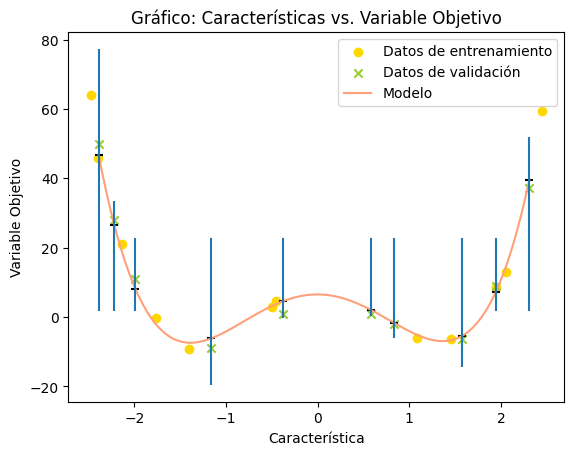

In [ ]:
plt.scatter(X_Train, y_Train, marker = 'o', c='gold', label='Datos de entrenamiento')
plt.scatter(X_Val, y_Val, marker = 'x', c='yellowgreen', label='Datos de validación')
plt.plot(xcoor, ycoor, color = 'lightsalmon', label = 'Modelo')
plt.scatter(X_Val, lasso.predict(create_matrix(X_Val,4)), marker = '_', color = 'black')
plt.errorbar(X_Val, y_Val, yerr = [abs(y_Val - lower), abs(upper-y_Val)], ls = 'none')
plt.xlabel('Característica')
plt.ylabel('Variable Objetivo')
plt.title('Gráfico: Características vs. Variable Objetivo')

plt.legend()
plt.show()

> Como se puede observar el modelo se ajusta bastante bien a los datos de entrenamiento y validación, sin embargo, el error encontrado a partir e bootstrap podría indicar que tenemos un modelo sobreajustado. Esto puede deberse a la poca cantidad de datos de entrenamiento.